### Data Representation in Scikit-Learn

In [12]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


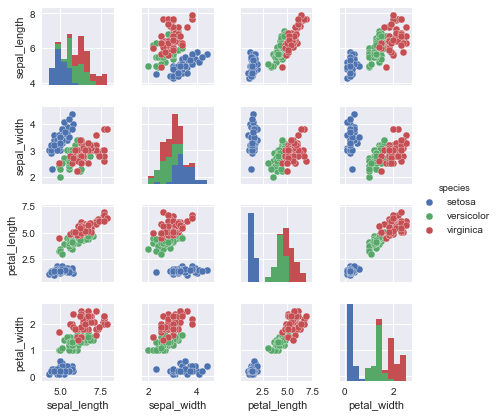

In [13]:
%matplotlib inline
sns.set()
sns.pairplot(iris, hue='species', size=1.5)

In [14]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [15]:
y_iris = iris['species']
y_iris.shape

(150,)

### Scikit-Learn's Estimator API

#### Basics of the API
1. Choose a class of model by importing the appropriate estimator class from Scikit-
Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion
from before.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the model to new data:

#### Supervised Learining Example: Simple Linear regression

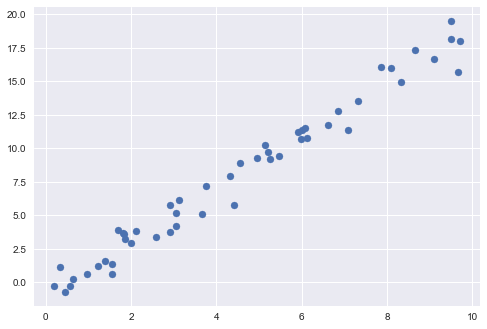

In [16]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2*x-1+rng.randn(50)
plt.scatter(x,y);

In [17]:
# 1 choose a class of model
from sklearn.linear_model import LinearRegression

In [18]:
# 2 choose model hyperparameters
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
# 3 Arrange data
X = x[:, np.newaxis]
X.shape

(50, 1)

In [20]:
# 4 fit model to data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

__by convention all model parameters that were learned during the fit() process have trailing underscores;__

In [21]:
model.coef_

array([ 1.9776566])

In [22]:
model.intercept_

-0.90331072553111635

__these are very close to the $2$ and $-1$ for the slope and intercept in the original data.__

In [23]:
# predict labels for unknown data
xfit = np.linspace(-1, 11)

In [24]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

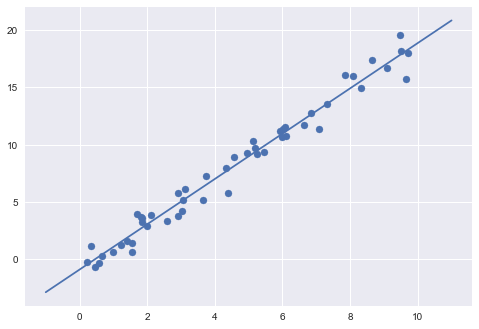

In [25]:
plt.scatter(x, y)
plt.plot(xfit,yfit);

#### Supervised learning example: iris classification

*Because it is so fast and has no hyperparameters to choose, Gaussian
naive Bayes is often a good model to use as a baseline classification, before you explore whether improvements can be found through more sophisticated models.*

In [26]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,random_state=1)

C:\Users\Aroogz\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
ytrain[:5] # hmm, so it's string?!

54     versicolor
108     virginica
112     virginica
17         setosa
119     virginica
Name: species, dtype: object

In [28]:
from sklearn.naive_bayes import GaussianNB  # choose model class
model = GaussianNB()                        # instantiate a model
model.fit(Xtrain, ytrain)                   # fit model to data
y_model = model.predict(Xtest)              # predict on new data

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.97368421052631582

#### Unsupervised learning example: Iris dimensionality

In [30]:
from sklearn.decomposition import PCA # 1. Choose the model class
model = PCA(n_components=2)           # 2. Instantiate
model.fit(X_iris)                     # 3. fit to data
X_2D = model.transform(X_iris)        # 4. Transform the data to 2D

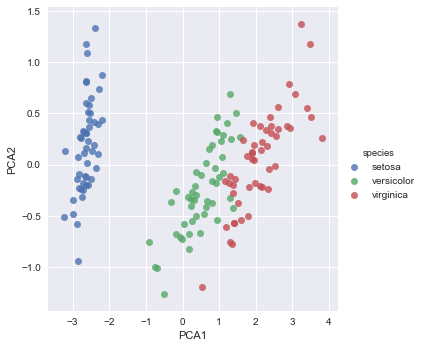

In [31]:
# let's plot the result
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

#### Unsupervised learning: Iris clustering

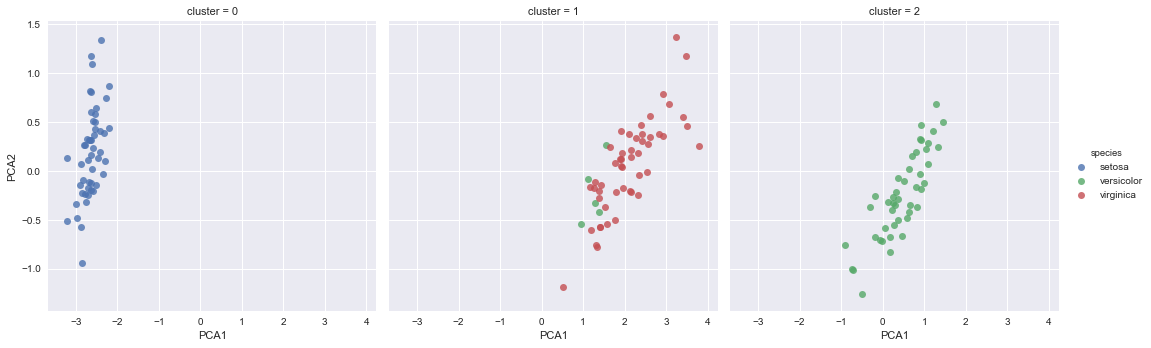

In [32]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3,covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
          col='cluster', fit_reg=False)

In [33]:
np.unique(y_gmm)

array([0, 1, 2], dtype=int64)

#### Application: Exploring Handwritten Digits

In [34]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

*1,797 samples, each consisting of an 8×8 grid of pixels.*

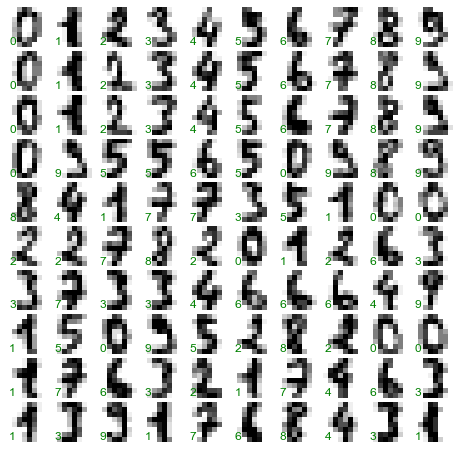

In [35]:
import matplotlib.pyplot as plt

fit, axes = plt.subplots(10,10, figsize=(8,8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')

In [36]:
X = digits.data
X.shape

(1797, 64)

In [37]:
y = digits.target
y.shape

(1797,)

### Unsupervised Learning: Dimensionality Reduction

In [38]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

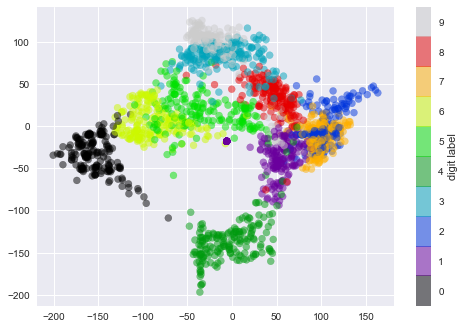

In [39]:
plt.scatter(data_projected[:, 0], data_projected[:, 1],
           c=digits.target, alpha=0.5,
           cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

#### Classification on digits

In [40]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [46]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
Xtest[:1]

array([[  0.,   0.,  11.,  16.,  15.,   3.,   0.,   0.,   0.,   5.,  16.,
         12.,  11.,  13.,   0.,   0.,   0.,   3.,  13.,   1.,   5.,  15.,
          0.,   0.,   0.,   0.,   0.,   0.,  12.,  11.,   0.,   0.,   0.,
          0.,   0.,   1.,  16.,   7.,   0.,   0.,   0.,   0.,   0.,  10.,
         15.,   0.,   0.,   0.,   0.,   0.,  12.,  16.,  16.,  11.,   1.,
          0.,   0.,   0.,  13.,  13.,   8.,  13.,  16.,   8.]])

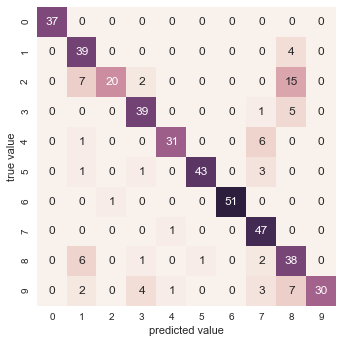

In [42]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, annot=True, cbar=False, square=1);
plt.xlabel('predicted value')
plt.ylabel('true value')

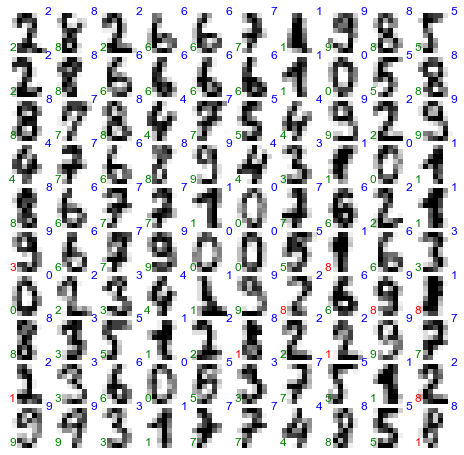

In [49]:
fig, axes = plt.subplots(10,10, figsize=(8,8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
           transform=ax.transAxes,
           color='green' if (ytest[i] == y_model[i]) else 'red' )
    ax.text(0.95,0.95, str(ytest[i]),
           transform=ax.transAxes,
           color='blue')